# Hashtags Project

### Postive vs Negative Hashtags

This project explores the question: Does the nature of the hashtag(it being postively worded or negatively worded) have an impact on the auidence interaction levels.

The primary dataset for this project will be obtained from Kaggle, a Google-owned platform for public data sharing.
The social media dataset includes a moderate sample size of over seven hundred records and has a high usability
score, ensuring accuracy and validity

In [10]:
# import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

##### Import the sentiment dataset

In [7]:
df_social = pd.read_csv('https://raw.githubusercontent.com/jimmynam0103/Hashtag_Engagement/main/data/sentimentdataset.csv')

In [9]:
df_social.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


#### Data Preparation

In [16]:
df_social = df_social[
    ['Timestamp','User', 'Platform', 'Hashtags', 'Sentiment', 'Likes', 'Retweets']]

In [17]:
df_social.head()

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0
1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0
2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0
3,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,Positive,15.0,8.0
4,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Neutral,25.0,12.0


Check if there is any missing value

In [19]:
df_social.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
Timestamp,0
User,0
Platform,0
Hashtags,0
Sentiment,0
Likes,0
Retweets,0


Distribution of each sentiments

/var/folders/xj/cpkhqbds3438q1hvt1nywb2c0000gn/T/ipykernel_37544/3074721119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ' Positive  '),
  Text(1, 0, ' Joy '),
  Text(2, 0, ' Excitement '),
  Text(3, 0, ' Neutral '),
  Text(4, 0, ' Contentment '),
  Text(5, 0, ' Happy '),
  Text(6, 0, ' Hopeful '),
  Text(7, 0, ' Sad '),
  Text(8, 0, ' Gratitude '),
  Text(9, 0, ' Curiosity '),
  Text(10, 0, ' Embarrassed '),
  Text(11, 0, ' Loneliness '),
  Text(12, 0, ' Elation       '),
  Text(13, 0, ' Bad '),
  Text(14, 0, ' Despair '),
  Text(15, 0, ' Hate '),
  Text(16, 0, ' Playful '),
  Text(17, 0, ' Gratitude     '),
  Text(18, 0, ' Curiosity       '),
  Text(19, 0, ' Enthusiasm    ')])

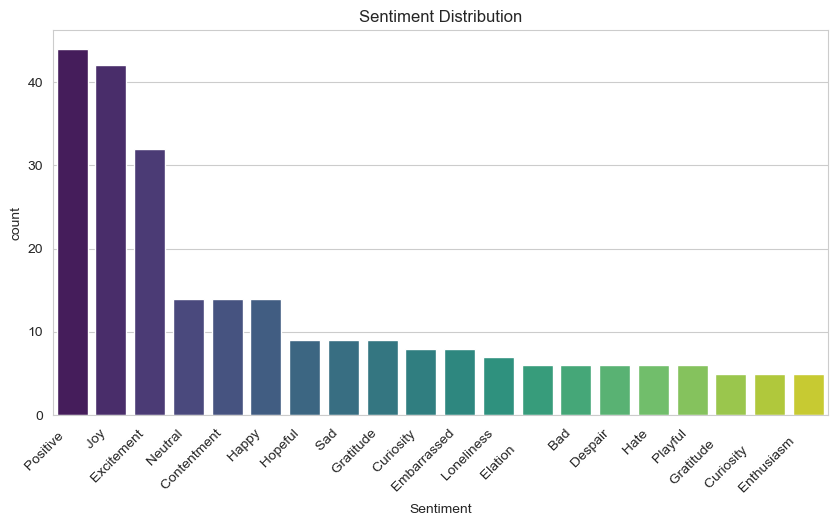

In [22]:
sns.set_style("whitegrid")

top_20_sents = df_social["Sentiment"].value_counts().nlargest(20).index
filtered_df = df_social[df_social["Sentiment"].isin(top_20_sents)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45, ha="right")

Average Likes per Sentiment

/var/folders/xj/cpkhqbds3438q1hvt1nywb2c0000gn/T/ipykernel_37544/3692160082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


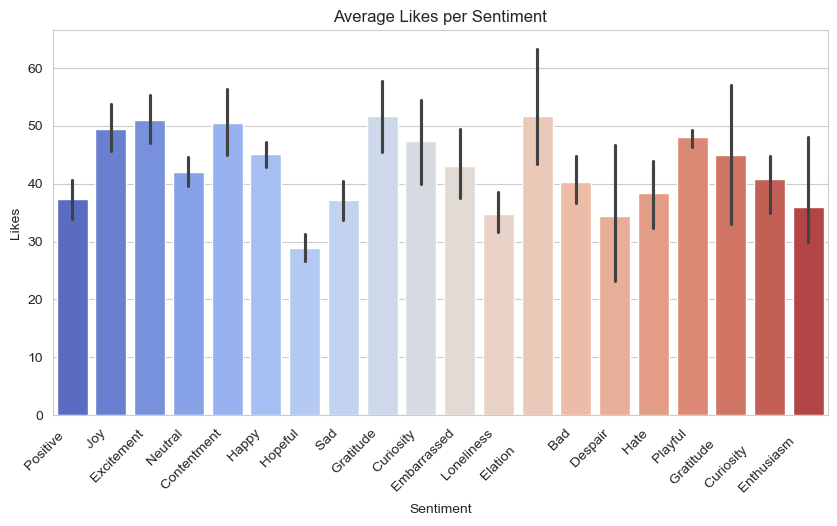

In [24]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"],
    y=filtered_df["Likes"],
    palette="coolwarm",
    order=top_20_sents
)

plt.title("Average Likes per Sentiment")
plt.xticks(rotation=45, ha="right")

plt.show()